In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#SOAL 1

# 1. Preparation

Badan Inteligen Cyber Crime sedang mendesain cara untuk mendeteksi fraud (Fraud
Detection) dalam transaksi pembayaran yang marak terjadi seiring dengan pertumbuhan platform finansial. Sebagai seorang analis yang telah mempelajari praktek Data Science dengan sejumlah code dan best practice,  Saudara diminta untuk membantu Badan Inteligen tersebut

Column terdiri dari : 

*Header*

step - memetakan satuan waktu di dunia nyata. Dalam kasus ini, 1 langkah adalah waktu 1 jam. Total langkah 744 (simulasi 30 hari).

type - CASH-IN, CASH-OUT, DEBIT, PEMBAYARAN dan TRANSFER.

amount - jumlah transaksi dalam mata uang lokal.

nameOrig - pelanggan yang memulai transaksi

oldbalanceOrg - saldo awal sebelum transaksi

newbalanceOrig - saldo baru setelah transaksi

nameDest - pelanggan yang merupakan penerima transaksi

oldbalanceDest - penerima saldo awal sebelum transaksi. Perhatikan bahwa tidak ada informasi untuk pelanggan yang dimulai dengan M (Pedagang).

newbalanceDest - penerima saldo baru setelah transaksi. Perhatikan bahwa tidak ada informasi untuk pelanggan yang dimulai dengan M (Pedagang).

isFraud - Ini adalah transaksi yang dilakukan oleh agen penipu di dalam simulasi. Dalam kumpulan data khusus ini, perilaku curang agen bertujuan untuk mendapatkan keuntungan dengan mengambil kendali atau akun pelanggan dan mencoba mengosongkan dana dengan mentransfer ke akun lain dan kemudian mencairkan sistem.

isFlaggedFraud - Model bisnis bertujuan untuk mengontrol transfer besar-besaran dari satu akun ke akun lain dan menandai upaya ilegal. Upaya ilegal dalam kumpulan data ini adalah upaya untuk mentransfer lebih dari 200.000 dalam satu transaksi.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/UTS/UTS1/PS_20174392719_1491204439457_log1.csv', delimiter=',')
file

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Dari hasil output tersebut, dapat diketahui bahwa data yang penulis miliki terdiri dari 6362619 entries, 11 variabel yaitu 3 variabel ( type, nameOrig ,nameDest ) yang memuliki tipe data objek, dan 3 variabel (step, isFraud, dan isFlaggedFraud)yang memiliki tipe data integer, juga 5 varibel ( amount,oldbalanceOrg,oldbalanceDest, newbalanceDest, newbalanceOrig ) yang memiliki tipe float

In [ ]:
file.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

Menghapus 'nameOrig' dan 'nameDest' karena datanya berbentuk objeck dan tidak berpengaruh

In [ ]:
file

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.00,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0,0


In [ ]:
file['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Mmeriksa apasaja isi dari variabel'type'

#A. Analisis statistik deskriptif dari sejumlah variabel dengan datasets yang dapat didownload melalui link di bawah. Bagaimana pengaruh distribusi data dan imbalance data antara fraud dan non-fraud?
**Analisis Statistik Deskriptif : adalah analisis yang dilakukan untuk menilai karakteristik dari sebuah data.**


In [ ]:
file.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Tidak ditemukan adanya non-null value

In [ ]:
file['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**0 = not Fraud, 
1 = Fraud
Terlihat bahwa terdapat 8.213 penipuan dalam transaksi pembayaran**

In [ ]:
file.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Terlihat bahwa rata-rata Fraud terjadi pada 'newbalanceDest'atau 'penerima saldo baru setelah transaksi' karena mamiliki angka yang terbesar dari yang lain. Rentang Fraud terjadi antara 0 sampai 3.561793. Median variabel tersebut sebesar 2.146614  

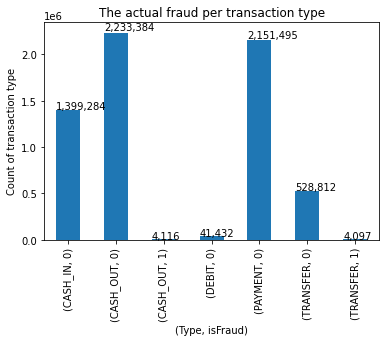

In [ ]:
plot_type = file.groupby(['type', 'isFraud'd
plot_type.set_ylabel("Count of transaction type")
for p in plot_type.patches:
    plot_type.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

Untuk Distribusi Data pada variabel 'Type'menggunakan Plot karena datanya berjenis objeck sehingga tidak bisa di statistikan. Tetapi karena variabel ini memiliki pengaruh maka harus diperhitungkan. 
Terlihat dari Plot bahwa selisih antara terjadinya Fraud dan Tidak terjadinya Fraud sangat jauh berbeda.
Walaupun Fraud terjadi pada saat transaksi 'Cash Out' sebanyak 4.116 kasus tetapi 'Cash Out' juga memilki persentase tidak terjadi Fraud. Diikuti 'Payment', 'Cash in' dan 'Debit Card' yang tidak terdapat Fraud
transaksi pada saat 'Transfer' angka tidak Fraud sebesar 528.812 transaksi
tetapi juga banyak terjadi Fraud yaitu sebesar 4.097 kasus. biasanya terjadi karena scrammers.

Hal-hal yang dapat dilakukan untuk mencegah Fraud saat 'Cash Out': 

Kontrol akses yang kuat ke sistem dan identifikasi risiko pihak ketiga

Otentikasi multi-faktor

Manajemen kata sandi yang kuat

Pengujian penetrasi secara regular

Pemasangan software pemantauan integritas file yang juga dapat berfungsi sebagai mekanisme pendeteksian

Sedangkan hal-hal yang dapat dilakukan untuk mencegah Fraud saat transaksi ' Transfer' :

Hindari mengirim uang kepada seseorang yang belum pernah ditemui secara langsung. Jika merasa harus mengirim uang, cobalah untuk tidak mengirim uang dalam jumlah besar sekaligus.

Gunakan layanan transfer uang yang tepercaya dan aman. Meskipun sebagian besar penyedia transfer uang bukanlah masalahnya, sebaiknya pilih layanan yang memperhatikan keamanan dengan serius.

#B. Dengan menggunakan 70% dataset sebagai data train dan sisanya 30% sebagai data test, bagaimana hasil prediksi dengan model Logistic Regression dan Random Forest?


##Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#creating a new dataframe 
file1 = file.copy()

In [ ]:
#type are categorical columns:
from sklearn.preprocessing import LabelEncoder
type1=LabelEncoder()
file1['type']= type1.fit_transform(file1['type'])

In [ ]:
file1['type']

0          3
1          3
2          4
3          1
4          3
5          3
6          3
7          3
8          3
9          2
10         2
11         3
12         3
13         3
14         3
15         1
16         3
17         3
18         3
19         4
20         3
21         2
22         2
23         3
24         4
25         3
26         3
27         3
28         3
29         3
          ..
6362590    4
6362591    1
6362592    4
6362593    1
6362594    4
6362595    1
6362596    4
6362597    1
6362598    4
6362599    1
6362600    4
6362601    1
6362602    4
6362603    1
6362604    4
6362605    1
6362606    4
6362607    1
6362608    4
6362609    1
6362610    4
6362611    1
6362612    4
6362613    1
6362614    4
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64

In [ ]:
y = file1['isFraud']
X = file1.drop(['isFraud'],axis=1)

In [ ]:
rfc = RandomForestClassifier() #using default values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% training and 30% testing
#training our model
model = rfc.fit(X_train,y_train)
#predicting our labels
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
print(classification_report(y_test,predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



0.9996861879749747

Dengan menggunakan Model Random Forest, mendapatkan tingkat Akurasi perhitungan Fraud sebesar 0,9996

##Model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#creating a new dataframe 
file2 = file.copy()

In [ ]:
#type are categorical columns:
from sklearn.preprocessing import LabelEncoder
type1=LabelEncoder()
file2['type']= type1.fit_transform(file2['type'])

In [ ]:
file2['type']

0          3
1          3
2          4
3          1
4          3
5          3
6          3
7          3
8          3
9          2
10         2
11         3
12         3
13         3
14         3
15         1
16         3
17         3
18         3
19         4
20         3
21         2
22         2
23         3
24         4
25         3
26         3
27         3
28         3
29         3
          ..
6362590    4
6362591    1
6362592    4
6362593    1
6362594    4
6362595    1
6362596    4
6362597    1
6362598    4
6362599    1
6362600    4
6362601    1
6362602    4
6362603    1
6362604    4
6362605    1
6362606    4
6362607    1
6362608    4
6362609    1
6362610    4
6362611    1
6362612    4
6362613    1
6362614    4
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64

In [ ]:
y = file1['isFraud']
X = file1.drop(['isFraud'],axis=1)

In [ ]:
LR = LogisticRegression() #using default values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% training and 30% testing
#training our model
model_LR = LR.fit(X_train,y_train)
#predicting our labels
predict_LR = model_LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(classification_report(y_test,predict_LR))
accuracy_score(y_test,predict_LR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.78      0.67      0.72      2435

    accuracy                           1.00   1908786
   macro avg       0.89      0.84      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786



0.9993346556397626

Dengan menggunakan Model Logistic Regression, mendapatkan tingkat Akurasi perhitungan Fraud sebesar 0,9993

#C. Berapa presisi kedua model berdasarkan Test Confusion Matrix? Model mana yang Saudara rekomendasikan? Jelaskan!

##Precision dari Model Random Forest

[[1906309      42]
 [    557    1878]]


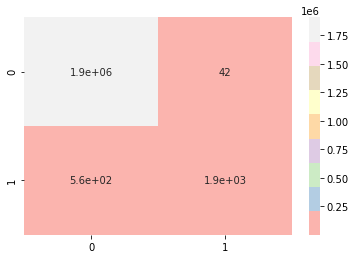

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="Pastel1")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='binary')
precision

0.978125

True Positive (TP): kita memprediksi Fraud sebesar 1878 dan memang benar terjadi

True Negative (TN): kita memprediksi Fraud tidak terjadi sebesar 1.906.309 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Fraud terjadi sebesar 557 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Fraud tidak terjadi 42 kasus dan ternyata prediksi salah, ternyata kasus fraud terjadi. 

Seperti telah dijelaskan di atas bahwa FN merupakan kesalahan tipe 2 dimana kesalahan ini sangat berbahaya. Contoh : Fraud di prediksi negatif terjadi padahal ternyata fraud positif terjadi maka fraud tersebut terlambat diketahui keadaan sebenarnya sehingga tidak segera dilakukan tindakan pencegahan . Dimana fraud tersebut dapat mengakibatkan kerugian bagi perusaahn atau individual.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model. 

Diperoleh bahwa dengan menggunakan model Random Forest tingkat precision sebesar 0,97

##Precision dari Model Logistic Regression

[[1905881     470]
 [    800    1635]]


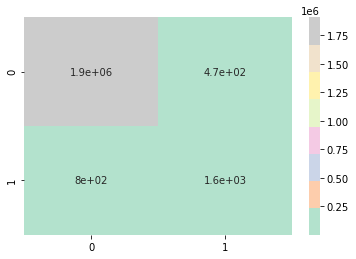

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_LR)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="Pastel2")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_LR, average='binary')
precision

0.7767220902612827

True Positive (TP): kita memprediksi Fraud sebesar 1635 dan memang benar terjadi

True Negative (TN): kita memprediksi Fraud tidak terjadi sebesar 1.905.881 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Fraud terjadi sebesar 800 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Fraud tidak terjadi 470 kasus dan ternyata prediksi salah, ternyata kasus fraud terjadi. 

Seperti telah dijelaskan di atas bahwa FN merupakan kesalahan tipe 2 dimana kesalahan ini sangat berbahaya. Contoh : Fraud di prediksi negatif terjadi padahal ternyata fraud positif terjadi maka fraud tersebut terlambat diketahui keadaan sebenarnya sehingga tidak segera dilakukan tindakan pencegahan . Dimana fraud tersebut dapat mengakibatkan kerugian bagi perusaahn atau individual.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model. 

Diperoleh bahwa dengan menggunakan model Random Forest tingkat precision sebesar 0,77

**Model prediksi yang paling mendekati menggunakan Model Random Forest dengan tingkat akurasi 0,9998 dan tingkat precision 0,97**

Random forest is a flexible

easy to use machine learning algorithm that produces

simplicity and diversity

versatility

produce a good prediction result

#D. Hitung berapa besar Area-Under-Curve (AUC) dan Receiver-Operator Characteristics (ROC) untuk model tersebut?

In [ ]:
y = file1['isFraud']
X = file1.drop(['isFraud'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% training and 30% testing

In [ ]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()

In [ ]:
probas1_ = clf1.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
probas2_ = clf2.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.metrics import roc_curve, auc
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc_model2 = auc(fp2, tp2)

In [ ]:
print("AUC for Logistic Regression Model : ",roc_auc_model1)
print("AUC for Random Forest Model :" ,roc_auc_model2)

AUC for Logistic Regression Model :  0.8848909263082858
AUC for Random Forest Model : 0.9690778803285962


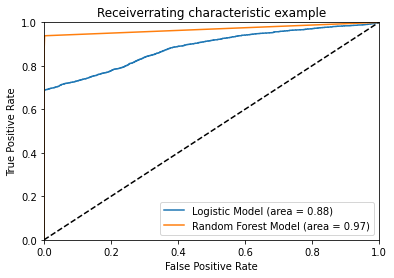

In [ ]:
plt.clf()
plt.plot(fp1, tp1, label='Logistic Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='Random Forest Model (area = %0.2f)' % roc_auc_model2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC-AUC untuk Model Logistic Regression sebesar 0,88

ROC-AUC untuk Model Random Forest sebesar 0,97

Terlihat bahwa Model Random Forest yang paling bagus karena semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus. 